1. Find the trips count for top 5 start destinations
2. find out farthest start and stop pair.
3. START DATE and END_DATE have string format. Convert it to datetime object
4. Calculate the time for the rides and convert it to numbers(minutes)
5. Plot, the miles and durations of trips month wise
6. Calculate highest value of miles for the driver on month Jan.
7. Calculate Sum of miles covered for each month 

In [288]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot
import seaborn as sns
from datetime import datetime
from datetime import timedelta
%matplotlib inline

In [281]:
uber_data= pd.read_csv('Uber Drives 2016.csv')

In [282]:
uber_data

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
...,...,...,...,...,...,...,...
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site
1154,12/31/2016 22:08,12/31/2016 23:51,Business,Gampaha,Ilukwatta,48.2,Temporary Site


In [48]:
uber_data.head(60)

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
5,1/6/2016 17:15,1/6/2016 17:19,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain
6,1/6/2016 17:30,1/6/2016 17:35,Business,West Palm Beach,Palm Beach,7.1,Meeting
7,1/7/2016 13:27,1/7/2016 13:33,Business,Cary,Cary,0.8,Meeting
8,1/10/2016 8:05,1/10/2016 8:25,Business,Cary,Morrisville,8.3,Meeting
9,1/10/2016 12:17,1/10/2016 12:44,Business,Jamaica,New York,16.5,Customer Visit


In [18]:
uber_data.describe()

,MILES*
count,1156.000000
mean,21.115398
std,359.299007
min,0.500000
25%,2.900000
50%,6.000000
75%,10.400000
max,12204.700000


In [19]:
uber_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   START_DATE*  1156 non-null   object 
 1   END_DATE*    1155 non-null   object 
 2   CATEGORY*    1155 non-null   object 
 3   START*       1155 non-null   object 
 4   STOP*        1155 non-null   object 
 5   MILES*       1156 non-null   float64
 6   PURPOSE*     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


In [20]:
uber_data['CATEGORY*'].unique()

array(['Business', 'Personal', nan], dtype=object)

In [50]:
uber_data['CATEGORY*'].isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
1151    False
1152    False
1153    False
1154    False
1155     True
Name: CATEGORY*, Length: 1156, dtype: bool

In [142]:
uber_data.isna().sum()

START_DATE*      0
END_DATE*        1
CATEGORY*        1
START*           1
STOP*            1
MILES*           0
PURPOSE*       503
dtype: int64

In [32]:
uber_data['START_DATE*'].isnull().sum()

0

In [43]:
uber_data['START*'].nunique()

177

In [39]:
uber_data['STOP*'].nunique()

188

In [45]:
uber_data['PURPOSE*'].isnull().sum()

503

In [283]:
uber_data

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
...,...,...,...,...,...,...,...
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site
1154,12/31/2016 22:08,12/31/2016 23:51,Business,Gampaha,Ilukwatta,48.2,Temporary Site


<AxesSubplot:xlabel='CATEGORY*', ylabel='MILES*'>

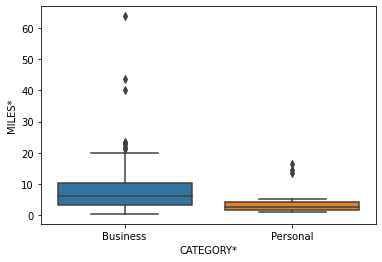

In [122]:
sns.boxplot(data=uber_data.head(200) , x='CATEGORY*', y='MILES*')

<AxesSubplot:xlabel='PURPOSE*', ylabel='MILES*'>

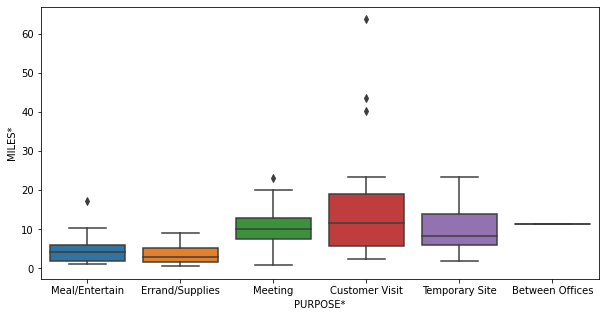

In [140]:
plt.figure(figsize=(10,5))
sns.boxplot(data=uber_data.head(200) , x='PURPOSE*', y='MILES*')

<AxesSubplot:xlabel='PURPOSE*', ylabel='count'>

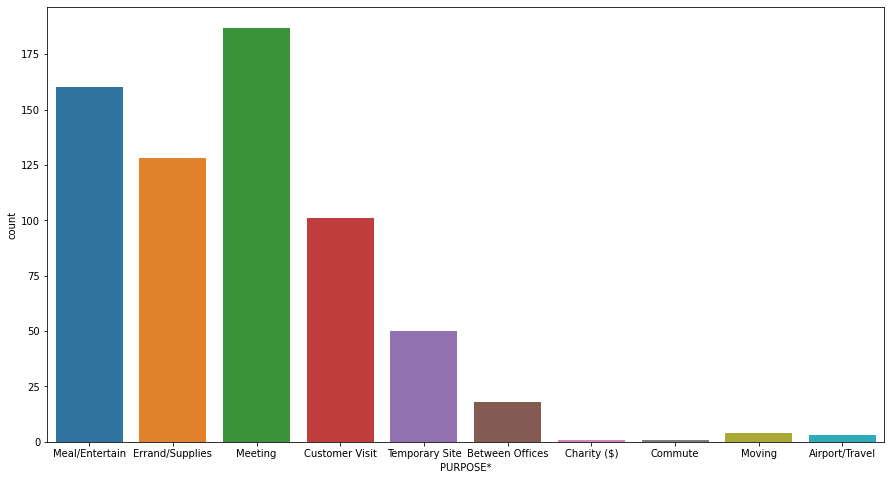

In [155]:
plt.figure(figsize=(15,8))

sns.countplot(data=uber_data, x='PURPOSE*')

<AxesSubplot:xlabel='CATEGORY*', ylabel='count'>

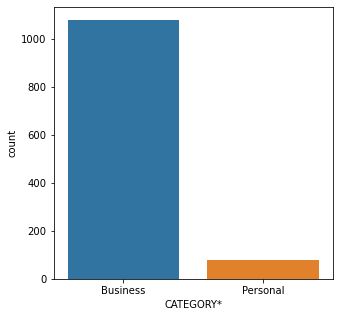

In [157]:
plt.figure(figsize=(5,5))

sns.countplot(data=uber_data, x='CATEGORY*')

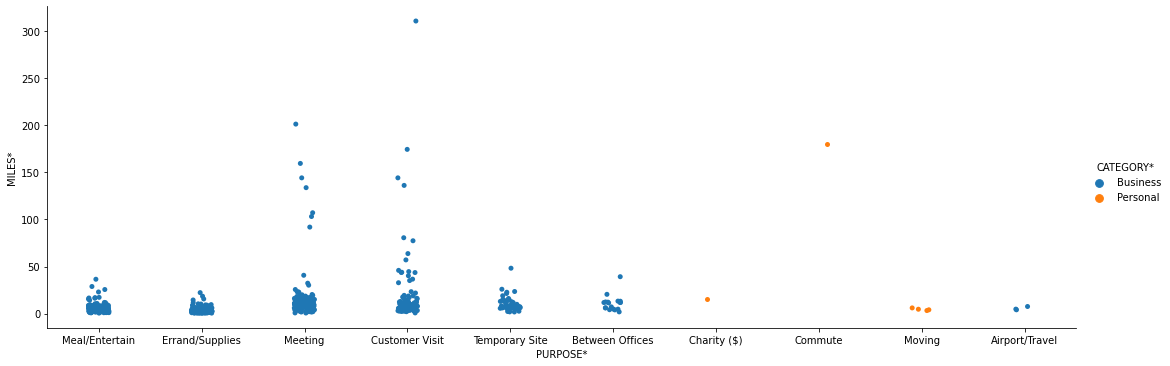

In [189]:
sns.catplot(data=uber_data, x='PURPOSE*', y='MILES*', hue='CATEGORY*',  aspect=3)

In [88]:
#here are the top 5 trips of start destinations
uber_data['START*'].value_counts().head()

Cary                201
Unknown Location    148
Morrisville          85
Whitebridge          68
Islamabad            57
Name: START*, dtype: int64

In [105]:
uber_data['MILES*']

0           5.1
1           5.0
2           4.8
3           4.7
4          63.7
         ...   
1151        3.9
1152       16.2
1153        6.4
1154       48.2
1155    12204.7
Name: MILES*, Length: 1156, dtype: float64

In [109]:
#here is the farthest start and stop pairs
#here Latta and Jacksonville are the farthest pair
uber_data.sort_values(by=['MILES*'], ascending=False).head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
1155,Totals,NaN,NaN,NaN,NaN,12204.7,NaN
269,3/25/2016 16:52,3/25/2016 22:22,Business,Latta,Jacksonville,310.3,Customer Visit
270,3/25/2016 22:54,3/26/2016 1:39,Business,Jacksonville,Kissimmee,201.0,Meeting
881,10/30/2016 15:22,10/30/2016 18:23,Business,Asheville,Mebane,195.9,NaN
776,9/27/2016 21:01,9/28/2016 2:37,Business,Unknown Location,Unknown Location,195.6,NaN


In [284]:
#convert end date to datetime object

uber_data['END_DATE*']=pd.to_datetime(uber_data['END_DATE*'],format = '%m/%d/%Y %H:%M',errors ='coerce')

uber_data['END_DATE*']

0      2016-01-01 21:17:00
1      2016-01-02 01:37:00
2      2016-01-02 20:38:00
3      2016-01-05 17:45:00
4      2016-01-06 15:49:00
               ...        
1151   2016-12-31 13:42:00
1152   2016-12-31 15:38:00
1153   2016-12-31 21:50:00
1154   2016-12-31 23:51:00
1155                   NaT
Name: END_DATE*, Length: 1156, dtype: datetime64[ns]

In [285]:
#convert start date to datetime object

uber_data['START_DATE*']=pd.to_datetime(uber_data['START_DATE*'],format = '%m/%d/%Y %H:%M',errors ='coerce')

uber_data['START_DATE*']

0      2016-01-01 21:11:00
1      2016-01-02 01:25:00
2      2016-01-02 20:25:00
3      2016-01-05 17:31:00
4      2016-01-06 14:42:00
               ...        
1151   2016-12-31 13:24:00
1152   2016-12-31 15:03:00
1153   2016-12-31 21:32:00
1154   2016-12-31 22:08:00
1155                   NaT
Name: START_DATE*, Length: 1156, dtype: datetime64[ns]

In [286]:
uber_data

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
...,...,...,...,...,...,...,...
1151,2016-12-31 13:24:00,2016-12-31 13:42:00,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,2016-12-31 15:03:00,2016-12-31 15:38:00,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,2016-12-31 21:32:00,2016-12-31 21:50:00,Business,Katunayake,Gampaha,6.4,Temporary Site
1154,2016-12-31 22:08:00,2016-12-31 23:51:00,Business,Gampaha,Ilukwatta,48.2,Temporary Site


In [345]:
ride_time= uber_data['END_DATE*'] -uber_data['START_DATE*']
ride_time.head()

0   0 days 00:06:00
1   0 days 00:12:00
2   0 days 00:13:00
3   0 days 00:14:00
4   0 days 01:07:00
dtype: timedelta64[ns]

In [324]:

uber_data['END_DATE*'].dt.strftime('%H:%M')

0       21:17
1       01:37
2       20:38
3       17:45
4       15:49
        ...  
1151    13:42
1152    15:38
1153    21:50
1154    23:51
1155      NaN
Name: END_DATE*, Length: 1156, dtype: object

In [350]:
#Calculate the time for the rides and convert it to numbers(minutes)

uber_data['ride_time']=uber_data['END_DATE*'].sub(uber_data['START_DATE*']).dt.total_seconds().div(60)

In [353]:
uber_data

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*,ride_time
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,6.0
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NaN,12.0
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,13.0
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,14.0
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,67.0
...,...,...,...,...,...,...,...,...
1151,2016-12-31 13:24:00,2016-12-31 13:42:00,Business,Kar?chi,Unknown Location,3.9,Temporary Site,18.0
1152,2016-12-31 15:03:00,2016-12-31 15:38:00,Business,Unknown Location,Unknown Location,16.2,Meeting,35.0
1153,2016-12-31 21:32:00,2016-12-31 21:50:00,Business,Katunayake,Gampaha,6.4,Temporary Site,18.0
1154,2016-12-31 22:08:00,2016-12-31 23:51:00,Business,Gampaha,Ilukwatta,48.2,Temporary Site,103.0


In [401]:

uber_data['Month']=uber_data['START_DATE*'].dt.strftime('%b')
uber_data['Month']

0       Jan
1       Jan
2       Jan
3       Jan
4       Jan
       ... 
1151    Dec
1152    Dec
1153    Dec
1154    Dec
1155    NaN
Name: Month, Length: 1156, dtype: object

In [400]:
#Plot, the miles and durations of trips month wise

pd.pivot_table(uber_data, index=['Month'])

,MILES*,ride_time
Month,,
Apr,20.611111,31.907407
Aug,10.041353,24.984962
Dec,6.721233,21.369863
Feb,7.897391,19.695652
Jan,8.408197,18.295082
Jul,10.933929,21.589286
Jun,7.803704,20.055556
Mar,14.990265,25.743363
May,7.424490,14.612245


<AxesSubplot:xlabel='Month'>

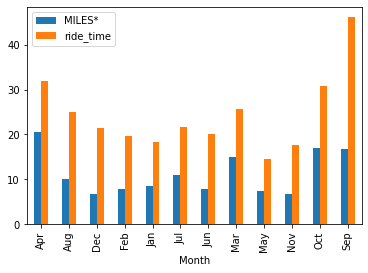

In [394]:
#Plot, the miles and durations of trips month wise

pd.pivot_table(uber_data, index=['Month']).plot(kind='bar')

<AxesSubplot:xlabel='Month', ylabel='ride_time'>

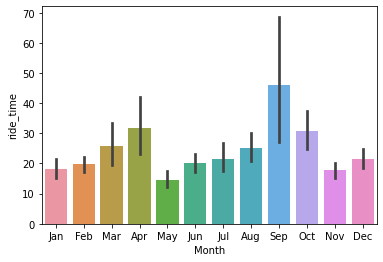

In [389]:
sns.barplot(data=uber_data, x='Month',y='ride_time')

<AxesSubplot:xlabel='Month', ylabel='MILES*'>

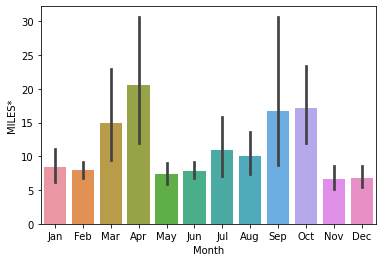

In [390]:
sns.barplot(data=uber_data, x='Month',y='MILES*')

In [433]:
#highest value of miles for the driver on month Jan

uber_data[['MILES*','Month']].head(61).max()

MILES*    63.7
Month      Jan
dtype: object

In [436]:
#highest value of miles for the driver of every month

uber_data.groupby(['Month'])['MILES*'].max()

Month
Apr    174.2
Aug    156.9
Dec    103.0
Feb     43.7
Jan     63.7
Jul    195.3
Jun     46.9
Mar    310.3
May     25.6
Nov     45.9
Oct    195.9
Sep    195.6
Name: MILES*, dtype: float64

In [437]:
#Sum of miles covered for each month

uber_data.groupby(['Month'])['MILES*'].sum()

Month
Apr    1113.0
Aug    1335.5
Dec     981.3
Feb     908.2
Jan     512.9
Jul    1224.6
Jun     842.8
Mar    1693.9
May     363.8
Nov     816.9
Oct    1810.0
Sep     601.8
Name: MILES*, dtype: float64